# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?


It appears that the number of marketing campaigns is flound the 'campaign' feature of the dataset. 
I used the sum of the numerical values here because multiple campaigns can be conducted on a single user over time, until certain criteria is met to officially justify closing a campaign. I believe just running a count on the shape of the dataframe would
be misleading to in this context.

#df['campaign'].sum() = 10451 Number of campagins

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [462]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay


import numpy as np
import seaborn as sns

In [437]:
df = pd.read_csv('/Users/jubacochran/Downloads/AI_ML_UC_Berkeley/Part_2_Machine_Learning_and_AI_Techniques/Module_17_Practical_Application_3/comparing_classifiers/module_17_starter/data/bank-additional-full.csv', delimiter =';')

In [438]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


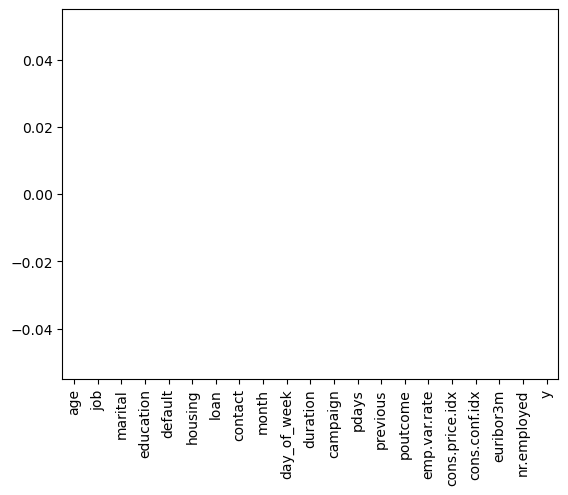

In [439]:

#Plotting null values in each feature
print(df.isnull().sum().plot.bar())
print(df.isna().sum().plot.bar())



In [440]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

df_ints = df.select_dtypes(['int64','float64'])
df_object = df.select_dtypes(['object'])
print(df_object.info())
print(df_ints.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  y            41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41

y
Failure       36548
Successful     4640
Name: count, dtype: int64

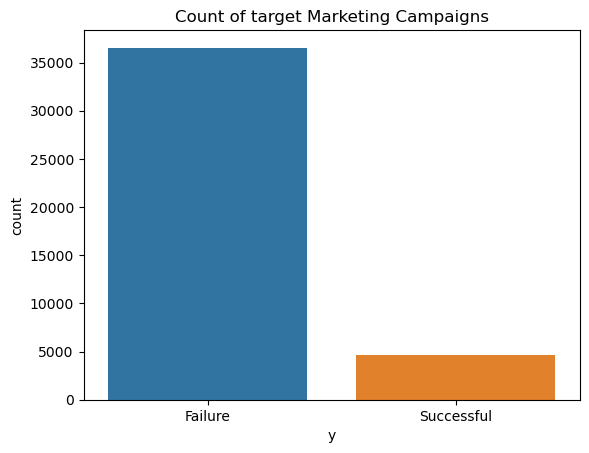

In [441]:
df['y'] = np.where(df['y']== 'yes', 'Successful', 'Failure')

sns.countplot(data=df, x = 'y')
plt.title('Count of target Marketing Campaigns')
df['y'].value_counts()


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business goal is to find a model that can explain success of a contact. This data will be used to create direct campaign marketing to potential buying customers. We'll attempt to identify the top categories for both success and failure in order to provide as much information for effective business decisions. 

In [442]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Failure
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Failure
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Failure
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Failure
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,Failure


### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [469]:
# Encode the target variable separately
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['y'])
#Grabbing features
X = df.drop(columns=['y'])


# Seperating X data types
df_ints = X.select_dtypes(['int64', 'float64'])
df_object = X.select_dtypes(['object'])
print(df_object.info())


# Creating the transformer for scaling and encoding
transform = make_column_transformer(
    (StandardScaler(), df_ints.columns),
    (OneHotEncoder(), df_object.columns)
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
dtypes: object(10)
memory usage: 3.1+ MB
None


In [444]:
# Creating the pipeline with the transformer and logistic regression
featureImportance_Pipeline = Pipeline([
    ('transform', transform),
    ('lgr', LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=1000))
])


In [445]:


# Looking for feature importance for classification
def importanceClassification(pipeline, X, y):
    Cs = np.logspace(-5, 0.5, 100)  # 100 values between 10^-5 and 10^0.5
    coef_list = []
    for C in Cs:
        pipeline.set_params(lgr__C=C)
        pipeline.fit(X, y)
        coef_list.append(list(pipeline.named_steps['lgr'].coef_[0]))

    # Creating coefficient dataframe
    # Getting the feature names from the transformer
    transform_step = pipeline.named_steps['transform']
    onehot_feature_names = transform_step.named_transformers_['onehotencoder'].get_feature_names_out(df_object.columns).tolist()
    all_feature_names = onehot_feature_names + df_ints.columns.tolist()
    
    coef_df = pd.DataFrame(coef_list, columns=all_feature_names)
    coef_df.index = Cs

    # Identify the top 5 positive and top 5 negative features for a specific C (let's take the last one)
    final_coefs = coef_df.iloc[-1]
    top_positive_features = final_coefs.nlargest(5)
    top_negative_features = final_coefs.nsmallest(5)
    
    top_features = pd.concat([top_positive_features, top_negative_features])

    # Plot the top features
    plt.figure(figsize=(10, 6))
    plt.barh(top_features.index, top_features.values, color=['green' if x > 0 else 'red' for x in top_features.values])
    plt.xlabel('Coefficient Value')
    plt.title('Top 5 Positive and Negative Features')
    plt.grid(True)
    plt.show()
    
    return coef_df, top_features


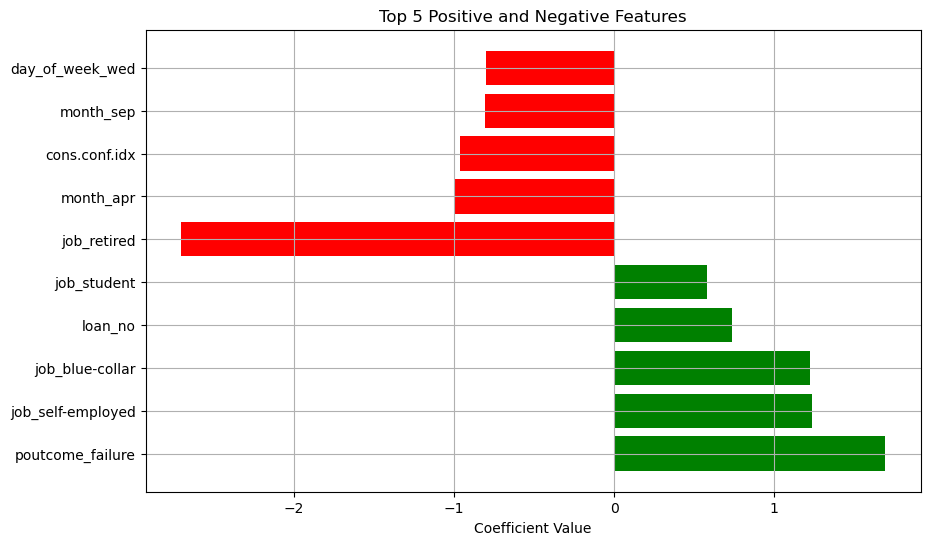

poutcome_failure     1.692636
job_self-employed    1.231902
job_blue-collar      1.219556
loan_no              0.736318
job_student          0.582321
job_retired         -2.703508
month_apr           -0.992359
cons.conf.idx       -0.961419
month_sep           -0.808400
day_of_week_wed     -0.797298
Name: 3.1622776601683795, dtype: float64


In [446]:
#importanceClassification(featureImportance_Pipeline,X,y_encoded)
# Run the importance classification
coef_df, top_features = importanceClassification(featureImportance_Pipeline, X, y_encoded)

# Print the top features
print(top_features)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [454]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state = 45)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [468]:
baselineLgrPipeline = Pipeline([('transform', transform),('lgr',LogisticRegression(max_iter=1000))]).fit(X,y_encoded)

baselineLgrPipeline.score(X_train,y_train)

0.9123692985011815

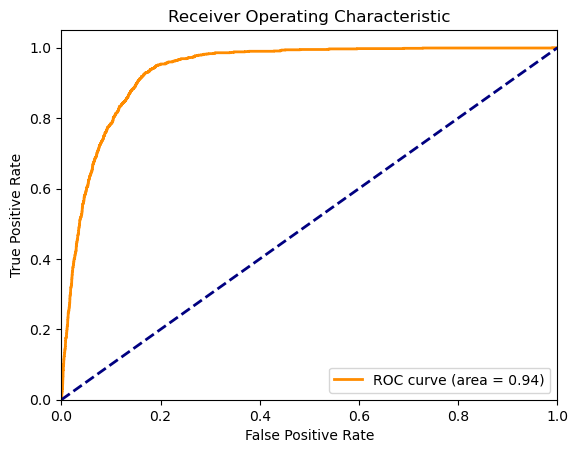

In [ ]:
# Predict probabilities
y_prob = baselineLgrPipeline.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions